In [1]:
# # Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
for coordinate in coordinates:
    print (coordinate[0], coordinate[1])

22.208590685159706 -63.26417126620757
70.4019075863726 8.192333782162109
57.35482748004523 -63.74382794363838
-68.28160050281937 -125.43246249495456
26.775191815685147 9.159339616190465
88.32402982837635 21.364513901777855
76.90017729752043 96.80247283321103
2.1311689101014935 -175.48399262843543
14.408046225273594 -11.023523678491358
-72.62562550282881 46.385583763285865
-36.985663879296546 127.51259615091772
-60.17965704506126 -119.89493629258098
78.00520236979051 137.39553395357228
-84.0550032595975 -136.74060045603193
-73.13897927468909 -167.5399463278666
-62.72827341213487 130.34643021885972
78.58913958045062 -109.6680589053743
8.975538824479898 163.26133500742986
59.22275958401701 -73.65693044062839
88.97719491764792 -102.7642653119136
-13.699372220204296 -171.88136880100953
-61.53298323037887 173.36801005830114
-7.193306660823794 -148.72129939232732
-58.0265410064002 142.34936351092767
-55.39665906076838 -45.60891786318288
28.440619760729987 -127.76617196552291
63.73429645678999

-3.998482754828771 -89.51487781286633
74.14070397874946 -176.77872226973537
87.19749250828701 -11.299689521354253
-42.067559433842064 -151.41894444036248
74.24576633159916 -85.0191551180511
-3.745279331094224 20.7570457216311
48.01976513987239 -117.71475948036303
-77.04522025572876 -125.14789063865243
-46.493715216120094 -31.39305025564272
-32.37022496385993 -152.70055024841162
-75.55929700447187 -58.14763181374772
-63.62456423344604 -171.89306696755395
-64.529632561607 -157.84345086855262
-29.658304974400963 171.6775498010473
-81.737267793954 -23.424191051961998
-2.981077167093815 -7.494397587919195
65.29703339026824 103.22616188190284
-41.993776346335665 -158.99146906451745
29.91321375858618 37.70792770283609
-55.64790275369139 50.827321209448684
-64.21869485155429 -10.456069541930646
-68.06507631041822 175.92662879616552
79.98627049824802 -89.53962091993868
0.47893207829919504 -102.0606697062279
-77.91731466179826 89.68100800760362
15.395737902994128 -171.36605179065717
38.205113438

14.904709606838168 -87.68474398176141
-9.722743254900323 -174.81927729243813
-40.75779781146439 -151.74224532223914
44.156326582509024 63.715501140092016
-41.7878224832233 156.0376444531533
-51.4546189380373 55.70679743841097
-33.16835110465765 -26.390583955471527
-69.18844634676904 -13.98945840154417
82.38623226156494 -153.46356074848728
17.72913762352576 65.58776477169636
-24.992490720243637 125.99086351517627
-5.360599532308541 -68.76815527298379
-60.380948216279194 113.32057754411386
-56.347952450574184 135.08846242421396
62.96272439960734 125.65434628352722
32.02780083967376 30.033347676397796
48.469685998613016 109.46525484106257
-59.832076886361044 86.75628939685004
54.62944925221808 68.67782714310289
70.98009630500502 -137.07947180524755
-74.75574862326246 -179.80673626717714
26.52952569836026 132.59997099547775
-73.40086689116063 83.15598035311496
-8.130561601194628 9.501562931539127
-41.72086381206693 -15.162862943857789
-21.85882844989935 -134.9528758858302
78.33112804673644

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]). city_name
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

848

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ae8986afd4f8569fe338149f5de8372


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | the valley
Processing Record 2 of Set 1 | sorland
Processing Record 3 of Set 1 | havre-saint-pierre
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | gat
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | kayes
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | tufulele
City not found. Skipping...
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1

Processing Record 36 of Set 4 | carnarvon
Processing Record 37 of Set 4 | piano di sorrento
Processing Record 38 of Set 4 | grindavik
Processing Record 39 of Set 4 | scottsburgh
City not found. Skipping...
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | batagay
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | stephenville
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | marcona
City not found. Skipping...
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | laguna
Processing Record 49 of Set 4 | saskylakh
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | nyurba
Processing Record 2 of Set 5 | marienburg
Processing Record 3 of Set 5 | gritsovskiy
Processing Record 4 of Set 5 | mount isa
Processing Record 5 of Set 5 | rocha
Processing Record 6 of Set 5 | tabuk
Processing Record 7 

Processing Record 19 of Set 8 | porto velho
Processing Record 20 of Set 8 | mareeba
Processing Record 21 of Set 8 | ancud
Processing Record 22 of Set 8 | amurzet
Processing Record 23 of Set 8 | koppa
Processing Record 24 of Set 8 | fare
Processing Record 25 of Set 8 | natal
Processing Record 26 of Set 8 | roebourne
Processing Record 27 of Set 8 | tomatlan
Processing Record 28 of Set 8 | kalabo
Processing Record 29 of Set 8 | elmira
Processing Record 30 of Set 8 | zhanaozen
Processing Record 31 of Set 8 | bethel
Processing Record 32 of Set 8 | port hedland
Processing Record 33 of Set 8 | columbus
Processing Record 34 of Set 8 | cape coast
Processing Record 35 of Set 8 | taoudenni
Processing Record 36 of Set 8 | sault sainte marie
Processing Record 37 of Set 8 | marystown
Processing Record 38 of Set 8 | carauari
Processing Record 39 of Set 8 | beloha
Processing Record 40 of Set 8 | makakilo city
Processing Record 41 of Set 8 | rundu
Processing Record 42 of Set 8 | ilebo
Processing Record

City not found. Skipping...
Processing Record 12 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 13 of Set 12 | maniitsoq
Processing Record 14 of Set 12 | novyy urengoy
Processing Record 15 of Set 12 | buraydah
Processing Record 16 of Set 12 | sungaipenuh
Processing Record 17 of Set 12 | porto uniao
Processing Record 18 of Set 12 | dunedin
Processing Record 19 of Set 12 | brufut
Processing Record 20 of Set 12 | soverato
Processing Record 21 of Set 12 | amol
Processing Record 22 of Set 12 | cam pha
City not found. Skipping...
Processing Record 23 of Set 12 | kindu
Processing Record 24 of Set 12 | manokwari
Processing Record 25 of Set 12 | neuquen
Processing Record 26 of Set 12 | los banos
Processing Record 27 of Set 12 | belyy yar
Processing Record 28 of Set 12 | dabakala
Processing Record 29 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 12 | isiro
Processing Record 31 of Set 12 | nyagan
Processing Record 32 of Set 12 | karakendzha
City

Processing Record 46 of Set 15 | rapoltu mare
Processing Record 47 of Set 15 | winnemucca
Processing Record 48 of Set 15 | denau
City not found. Skipping...
Processing Record 49 of Set 15 | namwala
Processing Record 50 of Set 15 | iwanai
Processing Record 1 of Set 16 | jijiga
Processing Record 2 of Set 16 | samusu
City not found. Skipping...
Processing Record 3 of Set 16 | mormugao
Processing Record 4 of Set 16 | tuxpan
Processing Record 5 of Set 16 | marawi
Processing Record 6 of Set 16 | karaton
Processing Record 7 of Set 16 | lasa
Processing Record 8 of Set 16 | torbat-e jam
Processing Record 9 of Set 16 | najran
Processing Record 10 of Set 16 | hervey bay
Processing Record 11 of Set 16 | micheweni
Processing Record 12 of Set 16 | brezice
Processing Record 13 of Set 16 | cumaribo
City not found. Skipping...
Processing Record 14 of Set 16 | pacific grove
Processing Record 15 of Set 16 | luena
Processing Record 16 of Set 16 | anadyr
Processing Record 17 of Set 16 | parry sound
Process

In [27]:
len(city_data)

781

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,The Valley,18.22,-63.06,87.80,74,40,10.29,AI,2020-11-25 16:46:24
1,Sorland,67.67,12.69,41.00,80,40,10.29,NO,2020-11-25 16:46:25
2,Havre-Saint-Pierre,50.23,-63.60,21.20,53,75,5.82,CA,2020-11-25 16:46:25
3,Rikitea,-23.12,-134.97,72.91,77,100,6.49,PF,2020-11-25 16:46:25
4,Gat,31.61,34.76,63.00,100,20,10.38,IL,2020-11-25 16:46:25
5,Longyearbyen,78.22,15.64,21.20,62,75,8.05,SJ,2020-11-25 16:44:20
6,Khatanga,71.97,102.50,9.46,96,94,8.46,RU,2020-11-25 16:46:26
7,Kayes,14.00,-11.00,92.66,10,0,9.10,ML,2020-11-25 16:46:26
8,Port Alfred,-33.59,26.89,63.00,63,16,8.63,ZA,2020-11-25 16:46:26
9,Esperance,-33.87,121.90,53.60,81,75,6.93,AU,2020-11-25 16:46:27


In [29]:
# rearrange the column
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,The Valley,AI,2020-11-25 16:46:24,18.22,-63.06,87.80,74,40,10.29
1,Sorland,NO,2020-11-25 16:46:25,67.67,12.69,41.00,80,40,10.29
2,Havre-Saint-Pierre,CA,2020-11-25 16:46:25,50.23,-63.60,21.20,53,75,5.82
3,Rikitea,PF,2020-11-25 16:46:25,-23.12,-134.97,72.91,77,100,6.49
4,Gat,IL,2020-11-25 16:46:25,31.61,34.76,63.00,100,20,10.38
...,...,...,...,...,...,...,...,...,...
776,Obregon,NI,2020-11-25 16:49:23,11.96,-85.96,86.00,66,20,18.34
777,Otavi,NA,2020-11-25 16:49:23,-19.65,17.33,84.58,36,52,9.82
778,Nesbyen,NO,2020-11-25 16:49:23,60.57,9.10,36.00,93,46,4.70
779,Champerico,GT,2020-11-25 16:49:24,14.30,-91.92,86.00,66,0,6.93


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

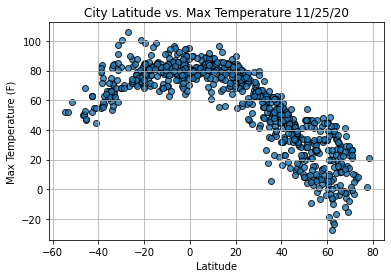

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

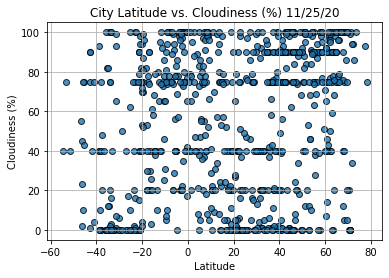

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

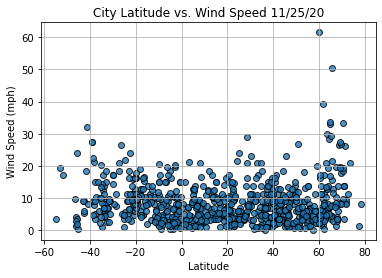

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index0 = city_data_df.loc[0]
index0

City                   The Valley
Country                        AI
Date          2020-11-25 16:46:24
Lat                         18.22
Lng                        -63.06
Max Temp                     87.8
Humidity                       74
Cloudiness                     40
Wind Speed                  10.29
Name: 0, dtype: object

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,The Valley,AI,2020-11-25 16:46:24,18.22,-63.06,87.80,74,40,10.29
1,Sorland,NO,2020-11-25 16:46:25,67.67,12.69,41.00,80,40,10.29
2,Havre-Saint-Pierre,CA,2020-11-25 16:46:25,50.23,-63.60,21.20,53,75,5.82
4,Gat,IL,2020-11-25 16:46:25,31.61,34.76,63.00,100,20,10.38
5,Longyearbyen,SJ,2020-11-25 16:44:20,78.22,15.64,21.20,62,75,8.05
...,...,...,...,...,...,...,...,...,...
775,Bureya,RU,2020-11-25 16:49:23,49.81,129.81,7.97,90,0,10.31
776,Obregon,NI,2020-11-25 16:49:23,11.96,-85.96,86.00,66,20,18.34
778,Nesbyen,NO,2020-11-25 16:49:23,60.57,9.10,36.00,93,46,4.70
779,Champerico,GT,2020-11-25 16:49:24,14.30,-91.92,86.00,66,0,6.93


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

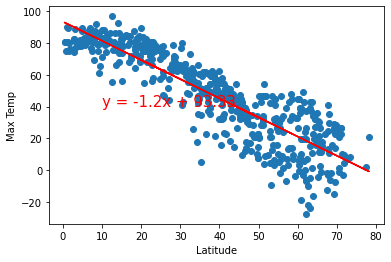

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(10,40))

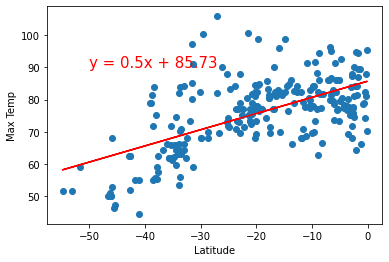

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

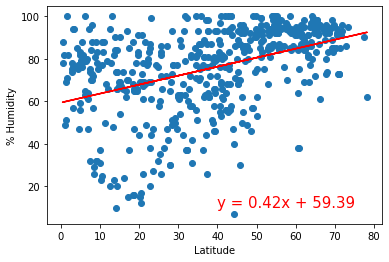

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

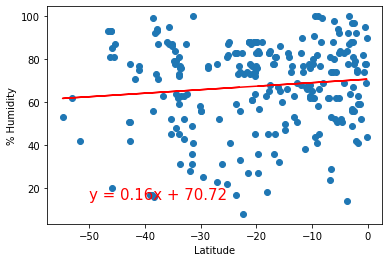

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

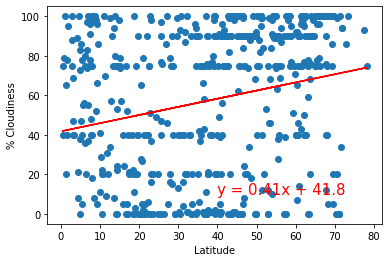

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

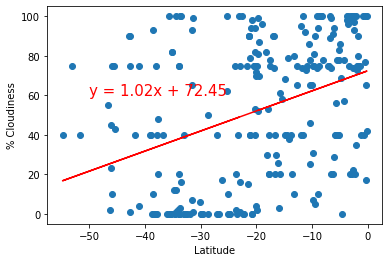

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [51]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
# print(f"The p-value is: {p_value:.3f}")
print(r_value)

0.3791951737054655


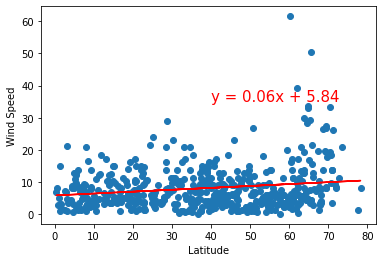

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

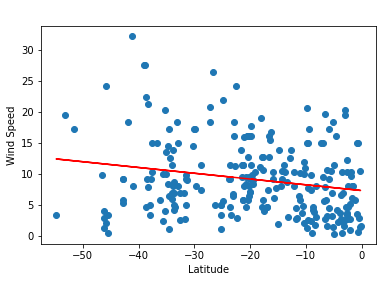

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))